In [2]:
# ✅ STEP 1: লাইব্রেরি ইনস্টল ও ইম্পোর্ট
!pip install pandas matplotlib seaborn scikit-learn streamlit pyngrok --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [3]:
# ✅ STEP 2: ডেটা লোড
from google.colab import files
uploaded = files.upload()  # এখান থেকে HR_Employee_Attrition.csv আপলোড করো

df = pd.read_csv('HR_Employee_Attrition.csv')
df.head()

Saving HR_Employee_Attrition.csv to HR_Employee_Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# ✅ STEP 3: ডেটা ক্লিনিং
df.info()  # ডেটার কাঠামো দেখা

# Null values আছে কি না দেখা
print(df.isnull().sum())

# Label Encoding for categorical values
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


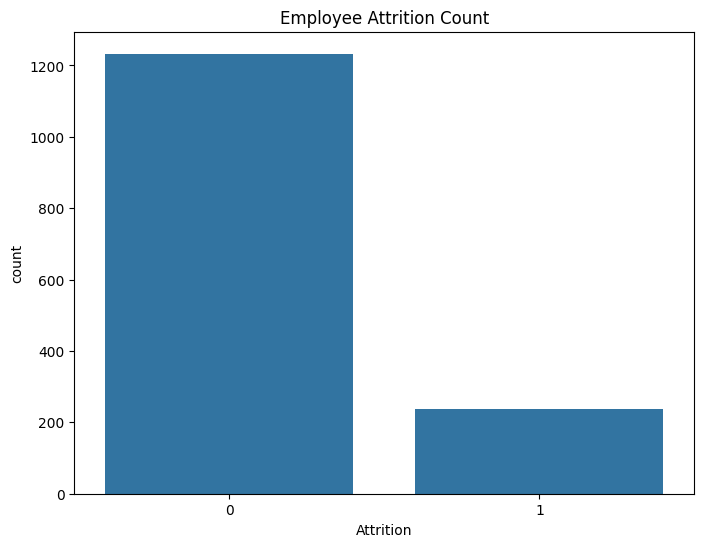

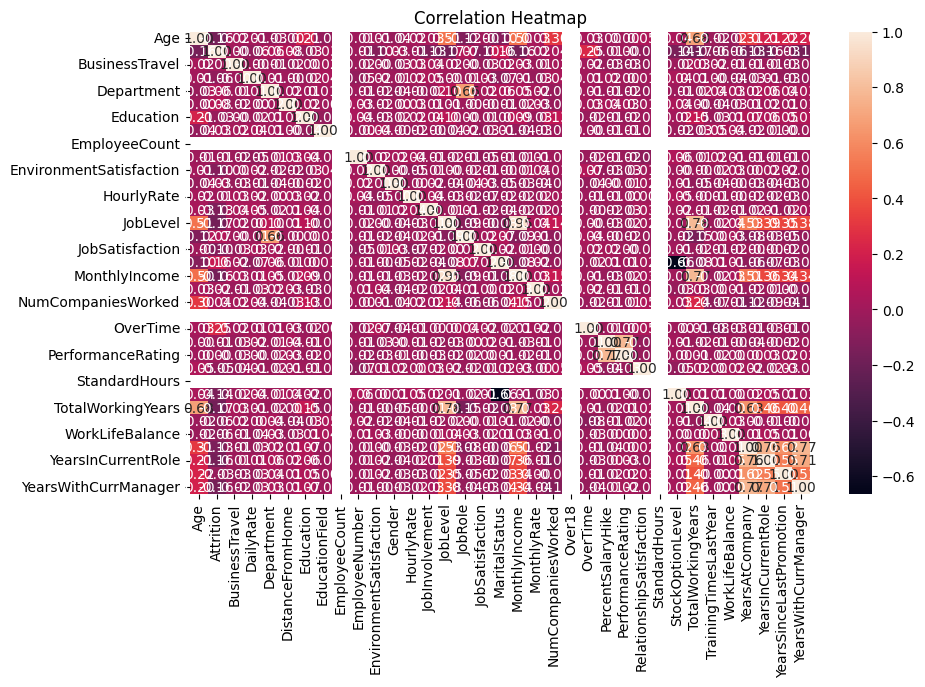

In [5]:
# ✅ STEP 4: ভিজ্যুয়ালাইজেশন
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# ✅ STEP 5: মডেল তৈরি
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



In [7]:
# ✅ STEP 1: Install necessary libraries
!pip install streamlit pyngrok scikit-learn pandas joblib --quiet

In [8]:
# ✅ STEP 2: Train and save the ML model
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load dataset
df = pd.read_csv("HR_Employee_Attrition.csv")

# Label encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'attrition_model.pkl')
print("✅ Model saved as attrition_model.pkl")

# Save feature names for input form
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'features.pkl')

✅ Model saved as attrition_model.pkl


['features.pkl']

In [9]:
# ✅ STEP 3: Write Streamlit app
streamlit_code = '''
import streamlit as st
import joblib
import numpy as np

# Load model and feature names
model = joblib.load("attrition_model.pkl")
features = joblib.load("features.pkl")

st.title("🧑‍💼 Employee Attrition Predictor")

# Dynamic input fields
inputs = []
for feature in features:
    val = st.number_input(f"{feature}", value=0)
    inputs.append(val)

if st.button("Predict"):
    pred = model.predict([inputs])
    result = "⚠️ Will Leave" if pred[0] == 1 else "✅ Will Stay"
    st.success(f"Prediction: {result}")
'''
with open("app.py", "w") as f:
    f.write(streamlit_code)

print("✅ Streamlit app saved as app.py")

✅ Streamlit app saved as app.py


In [10]:
# ✅ STEP 4: Set ngrok authtoken (🔁 তোমার ngrok token বসাও)
from pyngrok import conf
conf.get_default().auth_token = "2yjCtlTbClGgFcmHT7fb74YBMb9_2rMwFsHCRv7cKsiKQv883"  # নিজেরটা দাও

In [11]:
# ✅ STEP 5: Launch Streamlit + ngrok tunnel
import subprocess
import threading
from pyngrok import ngrok

# Kill old tunnel if running
ngrok.kill()

# Function to run Streamlit in background
def run():
    subprocess.run(["streamlit", "run", "app.py"])

# Start the Streamlit server in a new thread
threading.Thread(target=run).start()

# Create public URL via ngrok
public_url = ngrok.connect(addr="8501")
print("🚀 Your app is live at:", public_url)

🚀 Your app is live at: NgrokTunnel: "https://1960-34-66-170-149.ngrok-free.app" -> "http://localhost:8501"
